In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Your Question3 here
We will see if we can find the results of question 1 using the gradient descent.
a. Use the results of question 1.b) to find the couple (x, y) that minimizes f(x, y), this
time, with the gradient descent :

xn+1 = xn − μ.∂f/∂x(xn, yn)

yn+1 = yn − μ.∂f/∂y(xn, yn)

Use μ = 0.01, (x0, y0) = (7, 12) and define your number of iteration.

b. Plot the values of x and y during the iterative process.

c. Compute f(xfinal, yfinal) and compare with the result of question 1.

In [3]:
# Function f(x, y)
def f(x, y):
    return np.sqrt(x**2 + y**2 + np.pi)

# Gradients of f
def grad_f_x(x, y):
    return x / np.sqrt(x**2 + y**2 + np.pi)

def grad_f_y(x, y):
    return y / np.sqrt(x**2 + y**2 + np.pi)
# Gradient descent parameters
mu = 0.01
x0, y0 = 7, 12
iterations = 500

In [4]:
# Initialize variables
x, y = x0, y0
x_vals, y_vals = [x], [y]

# Gradient descent loop
for i in range(iterations):
    x_new = x - mu * grad_f_x(x, y)
    y_new = y - mu * grad_f_y(x, y)
    x, y = x_new, y_new
    x_vals.append(x)
    y_vals.append(y)





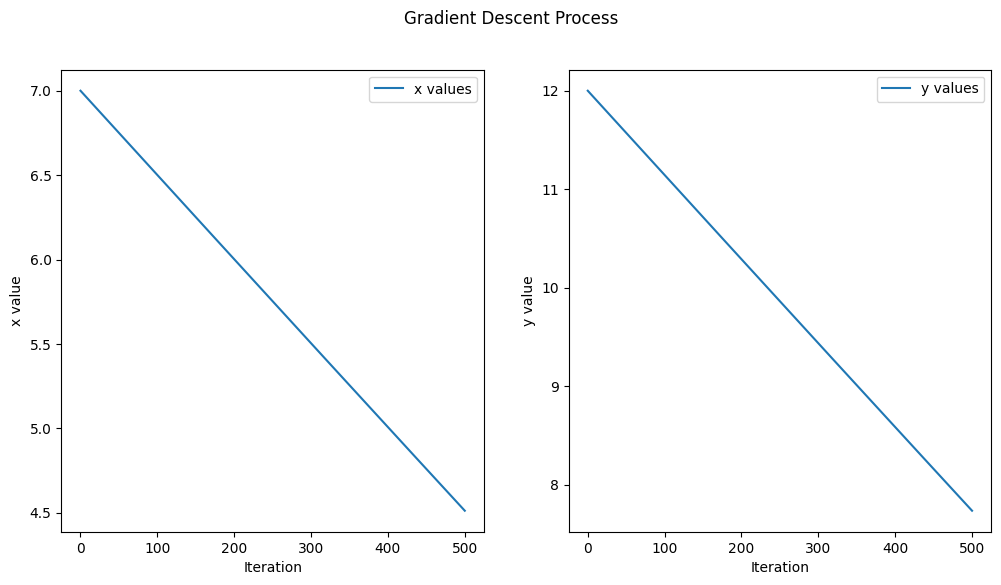

In [5]:
# Final values
x_final, y_final = x, y

# Plotting the values of x and y during the iterative process
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_vals, label='x values')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(y_vals, label='y values')
plt.xlabel('Iteration')
plt.ylabel('y value')
plt.legend()
plt.suptitle('Gradient Descent Process')
plt.show()

In [6]:
# Compute f(x_final, y_final)
f_final = f(x_final, y_final)
f_initial = f(x0, y0)

# Print the final results
print(f"Initial value of f(x0, y0): {f_initial}")
print(f"Final value of f(x_final, y_final): {f_final}")
print(f"Final (x, y): ({x_final}, {y_final})")

Initial value of f(x0, y0): 14.005055967527934
Final value of f(x_final, y_final): 9.128067105247087
Final (x, y): (4.5118271776279135, 7.73456087593357)


#### For  Question4

In [9]:
data = np.loadtxt('Assignment-data_week3.csv', dtype=float, delimiter=',', converters={0:float , 1:float })

In [10]:
x = data[:,0]
y = data[:,1]

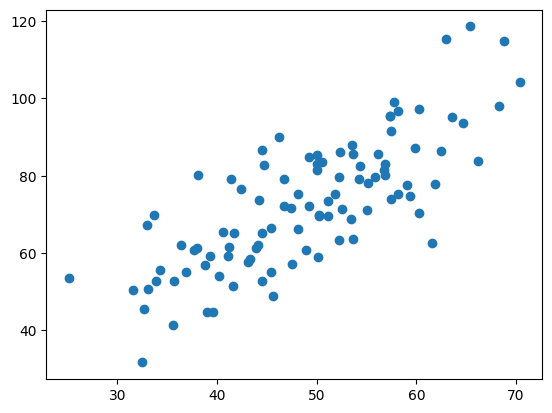

In [11]:
plt.scatter(x, y)

In [12]:
# CONSTRUCT THE DESIGN MAT
X = np.vstack((np.ones_like(x), x)).T

In [13]:
def MAE(X, y, w_0, w_1):
    """
       Input
        X : design matrix
        y : the responses
        w_0,w_1 : initial guess

        Return
        loss (mean absolute error) : the loss evaluated at (t)

       """
    m = len(y)
    w = [w_0, w_1]
    loss = np.mean(np.abs(y - y_hat))

    return loss

In [14]:
def computeGradients(x, y, w_0, w_1):
       """
       Input
        x : the treatment or input
        y : the responses
        w_0,w_1 : initial guess

        Return
        grad_0, grad_1: gradients of the loss evaluated at (t)

       """
       # Define y_hat

       y_hat = w_0 + w_1 * x
       error = y - y_hat

       #IMPLEMENT THE gradients with respect to w_0 and w_1

       grad_w1 = -np.mean(np.sign(error))
       grad_w0 =  -np.mean(np.sign(error) * x)
       return [grad_w0, grad_w1]

In [18]:
# initialize the weight
w_0 = 0
w_1 = 0

# Define the learning parameters
eta =0.01

num_iters =500

In [19]:
###
y_hat = w_0 + w_1 * x

lossVals = []
for i in range(num_iters):
    loss = MAE(X, y, w_0, w_1)
    lossVals.append(loss)


    # IMPLEMENT THE UPDATE using computeGradients(x, y, w_0, w_1)
    grad_w0, grad_w1 = computeGradients(x, y, w_0, w_1)

    w_0 -= eta * grad_w0
    w_1 -= eta * grad_w1


    #Save the values of the loss in lossVals
    print(f'Final w_0: {w_0}')
    print(f'Final w_1: {w_1}')

Final w_0: 0.4895834146155935
Final w_1: 0.01
Final w_0: 0.979166829231187
Final w_1: 0.02
Final w_0: 1.4687502438467805
Final w_1: 0.03
Final w_0: 1.958333658462374
Final w_1: 0.04
Final w_0: 2.4479170730779676
Final w_1: 0.05
Final w_0: 2.937500487693561
Final w_1: 0.060000000000000005
Final w_0: 3.4270839023091546
Final w_1: 0.07
Final w_0: 3.916667316924748
Final w_1: 0.08
Final w_0: 4.406250731540341
Final w_1: 0.09
Final w_0: 4.895834146155934
Final w_1: 0.09999999999999999
Final w_0: 5.385417560771527
Final w_1: 0.10999999999999999
Final w_0: 5.87500097538712
Final w_1: 0.11999999999999998
Final w_0: 6.3645843900027135
Final w_1: 0.12999999999999998
Final w_0: 6.8541678046183065
Final w_1: 0.13999999999999999
Final w_0: 7.3437512192339
Final w_1: 0.15
Final w_0: 7.833334633849493
Final w_1: 0.16
Final w_0: 8.322918048465086
Final w_1: 0.17
Final w_0: 8.812501463080679
Final w_1: 0.18000000000000002
Final w_0: 9.302084877696272
Final w_1: 0.19000000000000003
Final w_0: 9.79166829

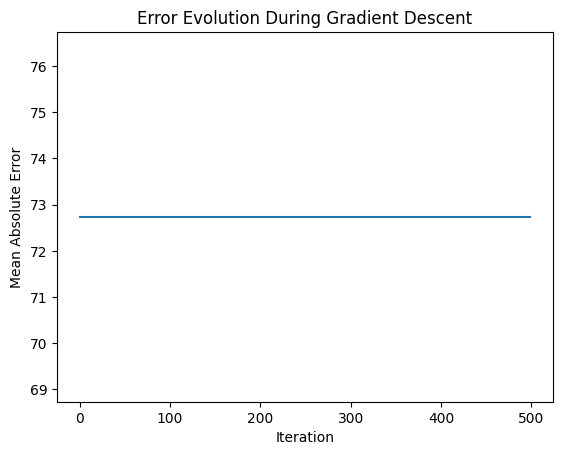

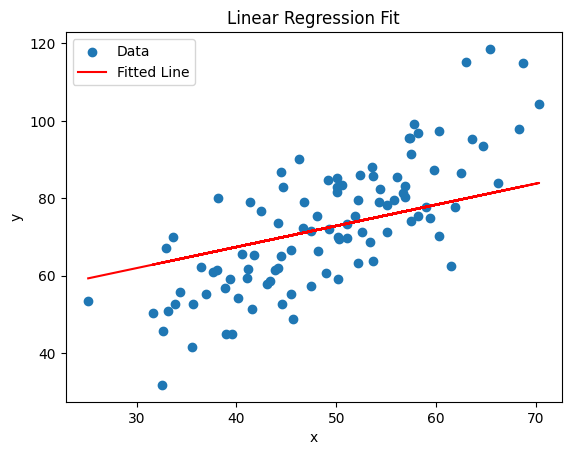

In [20]:
#===============================
# visualizing the loss function
#================================

plt.plot(lossVals)
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error')
plt.title('Error Evolution During Gradient Descent')
plt.show()

# Plot the regression line
plt.scatter(x, y, label='Data')
plt.plot(x, w_0 + w_1 * x, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()